semilla:  1
tamaño_colonia:  20
nro_iteraciones:  500
tasa_evaporacion:  0.1
beta:  2.5
q0:  0.9
entrada:  berlin52.txt
Tiempo:  25.368489742279053
Mejor distancia:  7753.438978105331
Mejor solucion:  [37 39 36 38 35 34 33 43 45 47 23  4 14  5  3 24 11 27 26 25 46 12 13 51
 10 50 32 42  9  8  7 40 18 44 31 48  0 21 30 17  2 16 20 41  6  1 29 22
 19 49 28 15]


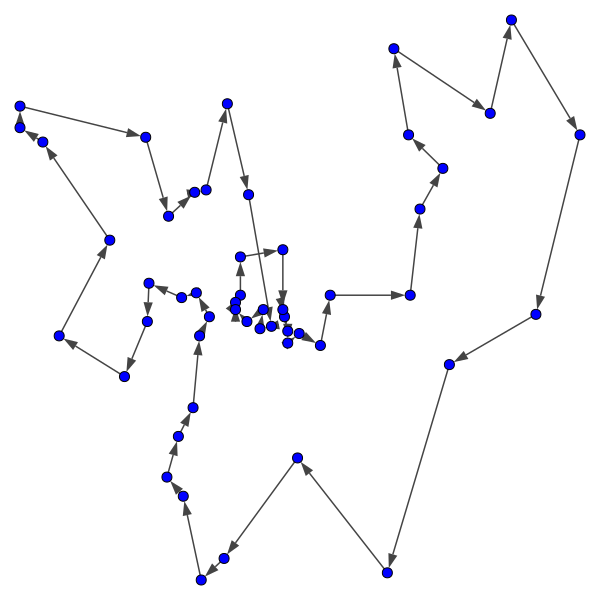

In [3]:
import numpy as np
import time
import sys
import pandas as pd
import igraph as ig

def distancia(ciudad1, ciudad2):
    return np.linalg.norm(ciudad1 - ciudad2)

def inicializar_colonia(tamaño_colonia, N):
    return np.zeros((tamaño_colonia, N), dtype=int)

def inicializar_feromona(N):
    return np.ones((N, N))

def evaporar_feromona(feromonas, tasa_evaporacion):
    feromonas *= (1.0 - tasa_evaporacion)
    return feromonas


semilla = 1
tamaño_colonia = 20
nro_iteraciones = 500
tasa_evaporacion = 0.1
beta = 2.5
q0 = 0.9
archivo_entrada = "berlin52.txt"
print("semilla: ", semilla)
print("tamaño_colonia: ", tamaño_colonia)
print("nro_iteraciones: ", nro_iteraciones)
print("tasa_evaporacion: ", tasa_evaporacion)
print("beta: ", beta)
print("q0: ", q0)
print("entrada: ", archivo_entrada)

    

df = pd.read_csv(archivo_entrada, skiprows=6, delim_whitespace=True, names=['Nodo', 'X', 'Y'], skipfooter=1, engine='python')

# Filtra solo las coordenadas que van del nodo 1 al nodo 52
coordenadas = df[df['Nodo'].between(1, 52)][['X', 'Y']]

# Convierte las coordenadas a una matriz de numpy
matriz_coordenadas = coordenadas.to_numpy()
nro_nodos = len(matriz_coordenadas)
np.random.seed(semilla)
start = time.time()

distancias = np.zeros((len(matriz_coordenadas), len(matriz_coordenadas)))
for i in range(len(matriz_coordenadas)):
    for j in range(len(matriz_coordenadas)):
        distancias[i, j] = distancia(matriz_coordenadas[i], matriz_coordenadas[j])
        
colonia = inicializar_colonia(tamaño_colonia, nro_nodos)
feromona = inicializar_feromona(nro_nodos)
ciudad_inicial = random_integer = np.random.randint(0, nro_nodos)
mejor_solucion = np.zeros((nro_iteraciones, nro_nodos), dtype=int)
mejor_distancia = np.inf


for iteracion in range(nro_iteraciones):
    for hormiga in range(tamaño_colonia):
        solucion = np.zeros(nro_nodos, dtype=int)
        solucion[0] = ciudad_inicial
        ciudades_visitadas = np.zeros(nro_nodos, dtype=int)
        ciudades_visitadas[ciudad_inicial] = 1
        for i in range(1, nro_nodos):
            ciudades_no_visitadas = np.where(ciudades_visitadas == 0)[0]
            probabilidades = np.zeros(len(ciudades_no_visitadas))
            for j in range(len(ciudades_no_visitadas)):
                probabilidades[j] = (feromona[solucion[i-1], ciudades_no_visitadas[j]]**beta) / (distancias[solucion[i-1], ciudades_no_visitadas[j]]**beta)
            if np.random.rand() < q0:
                solucion[i] = ciudades_no_visitadas[np.argmax(probabilidades)]
            else:
                solucion[i] = np.random.choice(ciudades_no_visitadas, p=probabilidades/np.sum(probabilidades)) #RULETA
            ciudades_visitadas[solucion[i]] = 1
        distancia_solucion = 0
        for i in range(nro_nodos - 1):
            distancia_solucion += distancias[solucion[i], solucion[i+1]]
        distancia_solucion += distancias[solucion[nro_nodos - 1], solucion[0]]
        if distancia_solucion < mejor_distancia:
            mejor_distancia = distancia_solucion
            mejor_solucion[iteracion] = solucion
    feromona = evaporar_feromona(feromona, tasa_evaporacion)
    for i in range(tamaño_colonia):
        for j in range(nro_nodos - 1):
            actualizar_feromona_local = ((1 - tasa_evaporacion) * feromona[mejor_solucion[iteracion, j], mejor_solucion[iteracion, j+1]]) + (tasa_evaporacion * 1)
            feromona[mejor_solucion[iteracion, j], mejor_solucion[iteracion, j+1]] += 1.0 / mejor_distancia
        actualizar_feromona_global = ((1 - tasa_evaporacion) * feromona[mejor_solucion[iteracion, nro_nodos - 1], mejor_solucion[iteracion, 0]]) + (tasa_evaporacion * feromona[i][j]**0)
        feromona[mejor_solucion[iteracion, nro_nodos - 1], mejor_solucion[iteracion, 0]] = actualizar_feromona_global

end = time.time()
print("Tiempo: ", end - start)
print("Mejor distancia: ", mejor_distancia)
print("Mejor solucion: ", solucion)

g = ig.Graph(directed =True)

g.add_vertices(len(matriz_coordenadas))

for i in range(len(solucion) - 1):
    g.add_edge(solucion[i], solucion[i + 1])

g.add_edge(solucion[-1], solucion[0])
layout = list(zip(matriz_coordenadas[:, 0], matriz_coordenadas[:, 1]))
ig.plot(g, layout=layout, bbox=(600, 600), vertex_size=10, vertex_color="blue", edge_width=1.5)

            